# 🎓 Admission prediction (Previsão de admissão)



# 📥 Importação das bibliotecas e leitura do dataset

Importando bibliotecas fundamentais para análise de dados, visualização e aprendizado de máquina

In [ ]:
import numpy as np  # NumPy: operações numéricas eficientes, criação de arrays, estatísticas etc.
import torch  # PyTorch: criação e treinamento de redes neurais, usado para modelagem profunda.
import matplotlib.pyplot as plt  # Visualização de dados: gráficos e plots.
from torch.utils.data import Dataset, TensorDataset, DataLoader  # Criação e carregamento de datasets em PyTorch
from torch.utils.data.dataset import random_split  # Divide datasets em partes (ex: treino/validação)
import torch.optim as optim  # Otimizadores como SGD, Adam, etc.
import torch.nn as nn  # Criação de camadas de redes neurais

from sklearn.preprocessing import StandardScaler  # Normalização de dados (zero média, desvio padrão 1)
from sklearn.model_selection import train_test_split  # Separação dos dados entre treino e teste
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc  # Métricas para avaliação de modelo
from matplotlib.colors import ListedColormap  # Para customizar cores em gráficos
from sklearn.metrics import accuracy_score  # Métrica de acurácia
# Configura os gráficos para aparecerem diretamente no notebook
%matplotlib inline
plt.style.use('fivethirtyeight')  # Aplica estilo visual nos gráficos

from collections import Counter  # Contagem de frequência de elementos
from IPython.display import display  # Exibição mais amigável de dataframes e outputs

Importações adicionais para experimentos com outros modelos além do PyTorch


In [ ]:
import pandas as pd  # Manipulação de dados em forma de tabela (dataframes)

# Métricas e modelos de ML (usados em comparação ou benchmarking)
from sklearn.metrics import mutual_info_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold  # KFold: validação cruzada
from sklearn.feature_extraction import DictVectorizer  # Transformação de dados categóricos em vetores
from sklearn.linear_model import LogisticRegression


import xgboost as xgb  # Biblioteca eficiente para boosting (pode ser usada como comparação)


# 📥Importação dos dados diretamente do Google Drive

In [ ]:
import gdown  # Biblioteca para baixar arquivos do Google Drive

# URL do arquivo hospedado no Google Drive
url = "https://drive.google.com/uc?id=1fojLrYihkpghAQvk9nCHl5M56uGP0JmH"
output = "MBA.csv"  # Nome do arquivo ao ser salvo localmente

# Realiza o download do arquivo
gdown.download(url, output, quiet=False)

# Carrega o dataset no DataFrame do pandas
df = pd.read_csv("MBA.csv")

# Exibe as primeiras linhas do dataset para inspeção inicial
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1fojLrYihkpghAQvk9nCHl5M56uGP0JmH
To: /content/MBA.csv
100%|██████████| 361k/361k [00:00<00:00, 51.4MB/s]

   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  


Renomeando o DataFrame para simplificar chamadas futuras

In [ ]:
data = pd.read_csv("MBA.csv")  # para não precisar ficar escrevendo esse nome sempre

# 🔍 Análise exploratória (EDA)  

📏 Verificando o número total de registros no dataset

In [ ]:
len(data)

6194

❓ Verificando a quantidade de valores ausentes por coluna


Passo importante para decidir se será necessário limpar ou imputar dados

In [ ]:
data.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


🧠 Separando as variáveis preditoras em numéricas e categóricas

In [ ]:
numerical = ["gpa", "gmat", "work_exp"]
categorical = ["gender", "international", "major", "race", "work_industry", "admission"]

# 📊 Análise estatística e visual das variáveis numéricas

Aqui visualizamos a distribuição das variáveis para entender os valores extremos, médias etc.

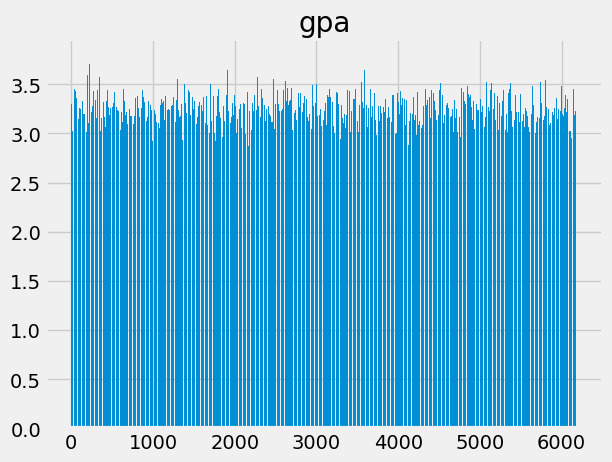

max value: 3.77
min value: 2.65
mean: 3.2507135938004517
median: 3.25


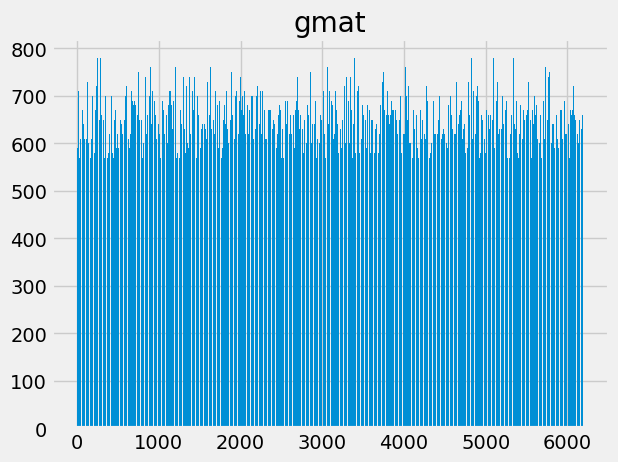

max value: 780.0
min value: 570.0
mean: 651.0929932192445
median: 650.0


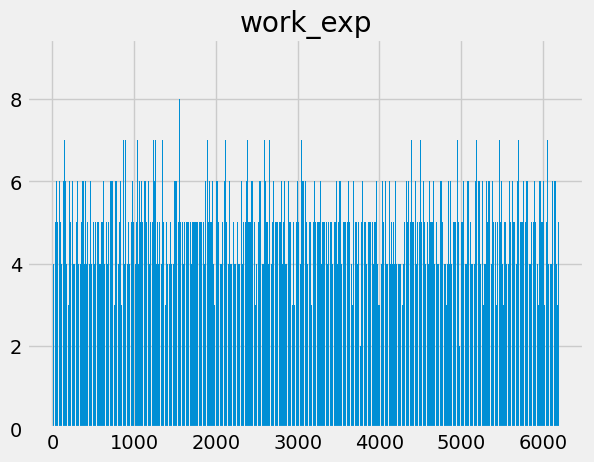

max value: 9.0
min value: 1.0
mean: 5.0169518889247655
median: 5.0


In [ ]:
for category in numerical:
    plt.bar(data.application_id, data[category])
    plt.title(category)
    plt.show()
    print(f"max value: {np.max(data[category])}")
    print(f"min value: {np.min(data[category])}")
    print(f"mean: {data[category].mean()}")
    print(f"median: {data[category].median()}")

Text(0.5, 1.0, 'GPA distribution')

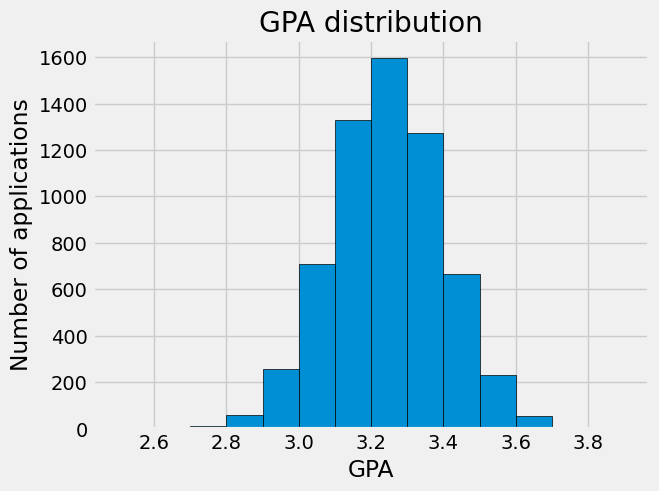

In [ ]:
bins = np.arange(2.5, 4, 0.10)
plt.hist(data.gpa, bins=bins, edgecolor='black')
plt.xlabel('GPA')
plt.ylabel('Number of applications')
plt.title("GPA distribution")

(array([ 634., 1393., 1795., 1462.,  676.,  234.]),
 array([550., 590., 630., 670., 710., 750., 790.]),
 <BarContainer object of 6 artists>)

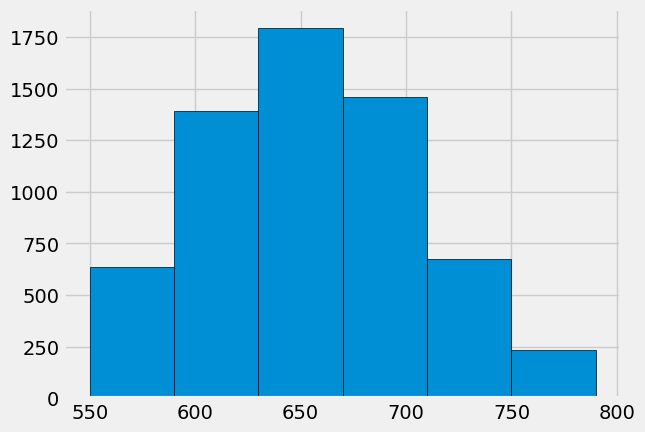

In [ ]:
bins = np.arange(550, 800, 40)
plt.hist(data.gmat, bins=bins, edgecolor='black')

Text(0.5, 1.0, 'Work experience distribution')

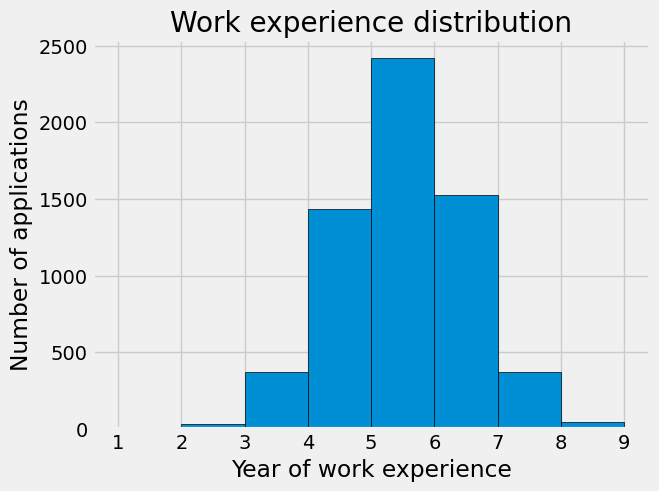

In [ ]:
bins = np.arange(1, 10, 1)
plt.hist(data.work_exp, bins=bins, edgecolor='black')
plt.xlabel('Year of work experience')
plt.ylabel('Number of applications')
plt.title("Work experience distribution")

## 📊 Análise das Variáveis Categóricas

In [ ]:
data[categorical].nunique()

,0
gender,2
international,2
major,3
race,5
work_industry,14
admission,2


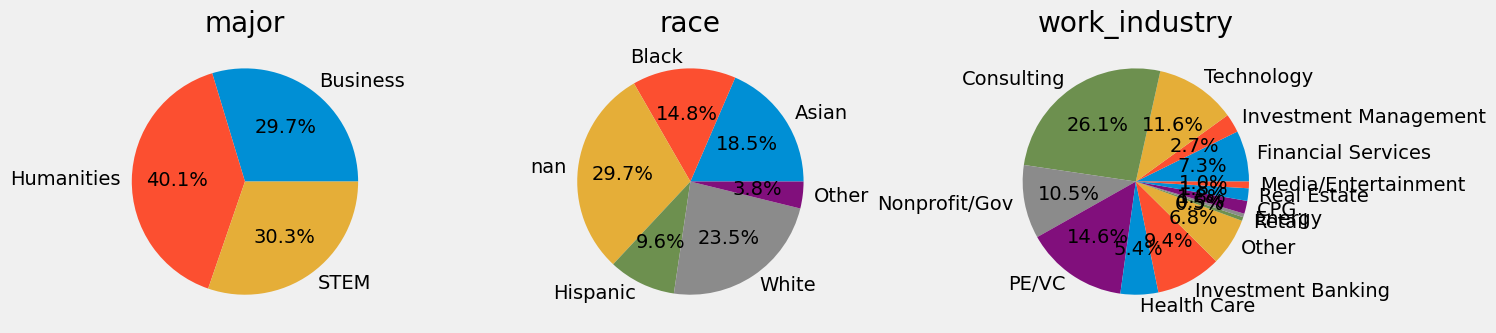

In [ ]:
# Lista das variáveis categóricas que você quer plotar
categories = ["major", "race", "work_industry"]

# Criar subplots com 1 linha e 3 colunas
fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

# Para cada categoria, cria o gráfico correspondente no eixo adequado
for i, category in enumerate(categories):
    counts = Counter(data[category])
    labels = list(counts.keys())
    values = list(counts.values())

    # Criação do gráfico de pizza
    axes[i].pie(values, labels=labels, autopct="%.1f%%")
    axes[i].set_title(category)

# Ajuste para evitar sobreposição
plt.tight_layout()
plt.show()

## 🛠️ Preparação da Coluna de Admissão (`admission`)

Para fins de treinamento e avaliação, *'Waitlist'* na coluna de admissão será substituído por *'Admit'*

In [ ]:
data.fillna(value={'race':  "Unknown"}, inplace=True)

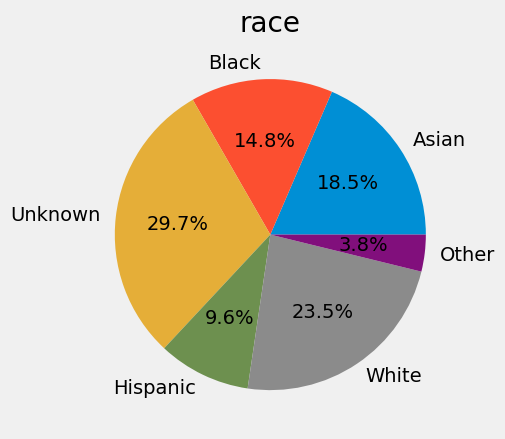

In [ ]:
counts_column = Counter(data["race"])
labels = list(counts_column.keys())
values = list(counts_column.values())
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("race")
plt.show()

In [ ]:
data.loc[data["admission"] == "Waitlist", "admission"] = "Admit"

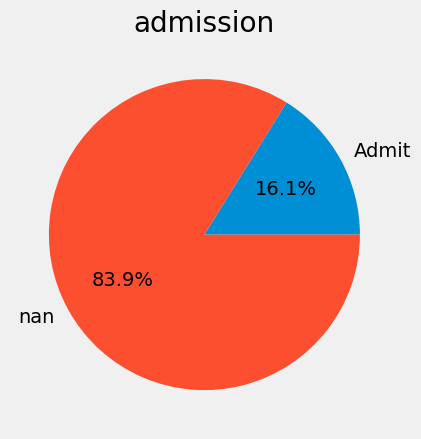

In [ ]:
counts_column = Counter(data["admission"])
labels = list(counts_column.keys())
values = list(counts_column.values())
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("admission")
plt.show()

In [ ]:
data["admission"] = (data["admission"] == "Admit").astype(int)

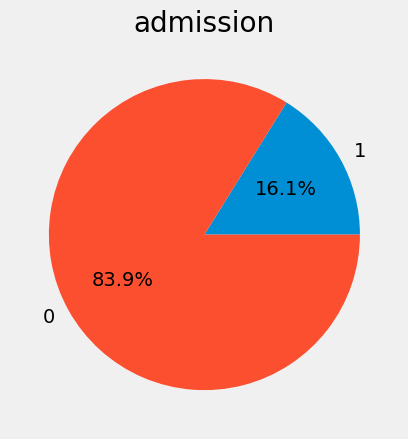

In [ ]:
counts_column = Counter(data["admission"])
labels = list(counts_column.keys())
values = list(counts_column.values())
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("admission")
plt.show()

## 📌 Importância das Variáveis (`Feature Importance`)

Nesta seção, buscamos entender **quais variáveis mais influenciam a admissão** de candidatos, tanto as **categóricas** quanto as **numéricas**.

### 🔍 Análise de Variáveis Categóricas

Para cada variável categórica (`gender`, `international`, `major`, `race`, `work_industry`), foi calculada a:

- **Média de admissão** por grupo (ex: homens vs mulheres);
- **Diferença em relação à média geral de admissão**;
- **Razão de risco** (*risk ratio*), que indica se a probabilidade de admissão em um grupo é maior ou menor que a média geral.

Isso ajuda a identificar grupos com maior ou menor chance de serem admitidos.

### ℹ️ Informação Mútua (`mutual_info_score`)

Foi utilizada a métrica de **informação mútua** para estimar a **dependência estatística entre cada variável categórica e a variável alvo (`admission`)**.

- Quanto maior o valor, **maior a relevância da variável categórica** para a previsão da admissão.

### 📈 Correlação com Variáveis Numéricas

Para as variáveis numéricas (`gpa`, `gmat`, `work_exp`, etc.), foi calculada a **correlação com a variável `admission`** usando `corrwith`.

- Correlações próximas de +1 ou -1 indicam **forte relação linear** com a admissão;
- Correlações próximas de 0 indicam **fraca ou nenhuma relação linear**.

Essa análise permite selecionar e justificar as variáveis mais relevantes para uso no modelo preditivo.


In [ ]:
categorical = ["gender", "international", "major", "race", "work_industry"]

In [ ]:
overall_admision = data.admission.mean()
overall_admision

np.float64(0.16144656118824668)

In [ ]:
for category in categorical:
    print(category)
    data_category = data.groupby(category).admission.agg(mean='mean', count='count')
    data_category['difference'] = data_category['mean'] - overall_admision
    data_category['risk_ratio'] = data_category['mean'] / overall_admision
    display(data_category)
    print()

gender


,mean,count,difference,risk_ratio
gender,,,,
Female,0.222124,2251,0.060677,1.375833
Male,0.126807,3943,-0.034640,0.785443



international


,mean,count,difference,risk_ratio
international,,,,
False,0.159007,4352,-0.002439,0.984892
True,0.167210,1842,0.005763,1.035696



major


,mean,count,difference,risk_ratio
major,,,,
Business,0.158868,1838,-0.002578,0.984030
Humanities,0.164450,2481,0.003003,1.018602
STEM,0.160000,1875,-0.001447,0.991040



race


,mean,count,difference,risk_ratio
race,,,,
Asian,0.184830,1147,0.023383,1.144837
Black,0.098253,916,-0.063193,0.608581
Hispanic,0.117450,596,-0.043997,0.727483
Other,0.210970,237,0.049524,1.306751
Unknown,0.167210,1842,0.005763,1.035696
White,0.185440,1456,0.023993,1.148613



work_industry


,mean,count,difference,risk_ratio
work_industry,,,,
CPG,0.184211,114,0.022764,1.141000
Consulting,0.158740,1619,-0.002707,0.983235
Energy,0.093750,32,-0.067697,0.580688
Financial Services,0.210643,451,0.049196,1.304723
Health Care,0.143713,334,-0.017734,0.890156
Investment Banking,0.155172,580,-0.006274,0.961138
Investment Management,0.222892,166,0.061445,1.380590
Media/Entertainment,0.152542,59,-0.008904,0.944847
Nonprofit/Gov,0.150538,651,-0.010909,0.932430


In [ ]:
data[categorical].apply(lambda x: mutual_info_score(x, data.admission)).sort_values()

,0
major,0.000023
international,0.000052
work_industry,0.001364
race,0.004419
gender,0.007527


In [ ]:
data[numerical].corrwith(data.admission).sort_values()

,0
work_exp,0.006821
gpa,0.289618
gmat,0.353645


## ✂️ Divisão dos Dados (`Split data`)

Nesta etapa, dividimos o conjunto de dados em três subconjuntos: **treinamento**, **validação** e **teste**, que são fundamentais para garantir a generalização do modelo.

As principais ações realizadas foram:

- Separação inicial dos dados em:
  - **80%** para treino/validação;
  - **20%** para teste final.
- Divisão dos 80% restantes em:
  - **60%** para treino;
  - **20%** para validação.
- Redefinição dos índices com `reset_index()` para evitar problemas durante o processamento.
- Separação da **variável alvo** (`admission`) dos dados de entrada.
- Definição das **features** utilizadas no modelo: `gpa`, `gmat` e `work_exp`.
- Conversão dos dados em **tensores PyTorch** e empacotamento em `TensorDataset` e `DataLoader`:
  - `train_loader`: fornece os dados em mini-lotes embaralhados para o treinamento;
  - `val_loader`: fornece os dados de validação;
  - `test_loader`: será usado para avaliar o modelo final.

Essa divisão é essencial para treinar o modelo com dados variados, validar seu desempenho de forma justa e garantir que o teste final simule novos dados nunca vistos.


In [ ]:
data_full_train, data_test = train_test_split(data, test_size=0.2)
data_train, data_val = train_test_split(data_full_train, test_size=0.25)

In [ ]:
print(f"train: {len(data_train)}, val: {len(data_val)}, test: {len(data_test)}")

train: 3716, val: 1239, test: 1239


In [ ]:
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [ ]:
y_train = data_train.admission.values
y_val = data_val.admission.values
y_test = data_test.admission.values

In [ ]:
del data_train["admission"]
del data_val["admission"]
del data_test["admission"]

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
y_val

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
columns_target = ["gpa" , "gmat", "work_exp"]

In [ ]:
df_train = data_train[columns_target]
df_train.head()

,gpa,gmat,work_exp
0,3.37,740.0,6.0
1,3.26,620.0,4.0
2,3.21,570.0,5.0
3,2.97,620.0,5.0
4,3.24,650.0,6.0


In [ ]:
df_val = data_val[columns_target]
df_test = data_test[columns_target]

In [ ]:
df_val.head()

,gpa,gmat,work_exp
0,3.42,660.0,5.0
1,3.47,690.0,5.0
2,3.38,730.0,5.0
3,3.08,590.0,4.0
4,3.45,710.0,7.0


In [ ]:
df_test.head()

,gpa,gmat,work_exp
0,3.48,630.0,5.0
1,3.27,610.0,6.0
2,3.31,670.0,6.0
3,3.29,660.0,5.0
4,3.02,570.0,3.0


In [ ]:
data_train.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
0,5052,Female,True,3.37,STEM,Unknown,740.0,6.0,PE/VC
1,5298,Female,False,3.26,Business,White,620.0,4.0,Technology
2,987,Male,False,3.21,Business,Hispanic,570.0,5.0,Nonprofit/Gov
3,991,Male,False,2.97,Humanities,White,620.0,5.0,Nonprofit/Gov
4,3469,Male,False,3.24,Business,Black,650.0,6.0,PE/VC


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  3716 non-null   int64  
 1   gender          3716 non-null   object 
 2   international   3716 non-null   bool   
 3   gpa             3716 non-null   float64
 4   major           3716 non-null   object 
 5   race            3716 non-null   object 
 6   gmat            3716 non-null   float64
 7   work_exp        3716 non-null   float64
 8   work_industry   3716 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 236.0+ KB


In [ ]:
torch.manual_seed(13)  # Define uma semente para garantir reprodutibilidade nos experimentos

# --- Treinamento ---
# Converte arrays numpy em tensores do PyTorch
x_train_tensor = torch.as_tensor(df_train.values).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

# Cria o dataset de treino (entrada e saída empacotadas)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)

# Cria o dataloader que fornece os dados em mini-lotes durante o treinamento
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,  # Tamanho do mini-lote
    shuffle=True     # Embaralha os dados a cada época
)

# --- Validação ---
# Converte arrays numpy em tensores do PyTorch
x_val_tensor = torch.as_tensor(df_val.values).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Cria o dataset de validação
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Cria o dataloader de validação
val_loader = DataLoader(dataset=val_dataset, batch_size=16)

# --- Teste ---
# Converte arrays numpy em tensores do PyTorch
x_test_tensor = torch.as_tensor(df_test.values).float()
y_test_tensor = torch.as_tensor(y_test.reshape(-1, 1)).float()

# Cria o dataset de teste
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Cria o dataloader de teste
test_loader = DataLoader(dataset=test_dataset, batch_size=16)


## 🧹 Preparação dos Dados (`Data Preparation`)

Nesta etapa, realizamos o pré-processamento dos dados, preparando-os para serem utilizados pelo modelo de machine learning.

As principais atividades foram:

- **Separação dos dados** em variáveis preditoras (`X`) e variável alvo (`y`);
- **Divisão do conjunto de dados** em treino, validação e teste (70% treino, 15% validação e 15% teste), garantindo amostragem estratificada e reprodutibilidade;
- **Normalização dos dados numéricos** com `StandardScaler`, para garantir que todas as variáveis estejam na mesma escala — o que melhora o desempenho e a estabilidade do treinamento;
- Conversão dos dados em **tensores PyTorch** e organização em **DataLoaders**, que permitem o uso eficiente de mini-batches durante o treinamento e validação.

Essa preparação garante que os dados estejam limpos, bem organizados e prontos para serem utilizados no modelo.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define X e y antes da divisão
X = data[numerical]  # 'numerical' representa as colunas com atributos numéricos
y = data['admission']  # 'admission' é a variável alvo (target)

# Divide o conjunto de dados em treino, validação e teste
# 30% dos dados serão usados para teste + validação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=13)

# Divide os 30% restantes igualmente em 15% para validação e 15% para teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)

# Inicializa o objeto StandardScaler para normalização
sc = StandardScaler()

# Seleciona apenas as colunas numéricas para aplicar a normalização
numerical_features = X_train.select_dtypes(include=['number']).columns

# Ajusta o scaler apenas com os dados de treino
# Isso calcula a média e o desvio padrão para usar na normalização
sc.fit(X_train[numerical_features])

# Aplica a transformação (normalização) nos dados de treino
X_train[numerical_features] = sc.transform(X_train[numerical_features])

# Aplica a mesma transformação nos dados de validação
X_val[numerical_features] = sc.transform(X_val[numerical_features])

# Aplica a mesma transformação nos dados de teste
X_test[numerical_features] = sc.transform(X_test[numerical_features])


## ⚙️ Configuração do Modelo (`Model Configuration`)

Nesta etapa, definimos a estrutura e os parâmetros do modelo de rede neural que será utilizado para realizar a previsão.

As principais ações realizadas são:

- Definição da **taxa de aprendizado** (`learning rate`), que controla o quanto o modelo ajusta seus pesos a cada iteração;
- Criação de um modelo simples com uma **camada linear** (`nn.Linear`) que conecta as variáveis de entrada à saída;
- Escolha do **otimizador** (`SGD` - Gradiente Descendente Estocástico), responsável por atualizar os pesos do modelo;
- Definição da **função de perda** (`BCEWithLogitsLoss`), apropriada para problemas de classificação binária.

Essa configuração é essencial para preparar o modelo antes de iniciar o processo de treinamento.


In [ ]:
import torch.nn as nn

# Define a taxa de aprendizado (learning rate) — também conhecida como "eta"
lr = 0.1

# Define uma semente aleatória para garantir reprodutibilidade
torch.manual_seed(42)

# Cria um modelo sequencial com uma camada linear
# Neste caso, 3 entradas e 1 saída
model = nn.Sequential()
model.add_module('linear', nn.Linear(3, 1))

# Define o otimizador SGD (Gradiente Descendente Estocástico)
# que será responsável por atualizar os pesos do modelo
optimizer = optim.SGD(model.parameters(), lr=lr)

# Define a função de perda BCE com Logits
# Usada para problemas de classificação binária
loss_fn = nn.BCEWithLogitsLoss()


## 🧠 Classe `Architecture` (Arquitetura de Treinamento)

Nesta seção, definimos uma classe chamada `Architecture`, que tem como objetivo organizar e automatizar todo o processo de treinamento de modelos com PyTorch de forma clara e reutilizável.

Ela encapsula funcionalidades essenciais como:

- Envio do modelo para o dispositivo (CPU ou GPU);
- Execução do treino e validação por mini-batches;
- Controle de épocas e registro das perdas (losses);
- Salvamento e carregamento de checkpoints;
- Geração de previsões (`predict`);
- Visualização do desempenho com gráficos.

Essa abordagem orientada a objetos facilita a reutilização do código, melhora a organização e permite controlar melhor o experimento de aprendizado de máquina.

In [ ]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Definimos os atributos da nossa classe

        # Armazenamos os argumentos como atributos para uso posterior
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

        # Envia o modelo imediatamente para o dispositivo disponível (GPU ou CPU)
        self.model.to(self.device)

        # Esses atributos são definidos aqui, mas ainda não recebem valores
        self.train_loader = None
        self.val_loader = None

        # Atributos que serão calculados internamente
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Cria a função de treino usando os atributos da classe
        self.train_step_fn = self._make_train_step_fn()

        # Cria a função de validação
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # Método para mudar o dispositivo do modelo (ex: de CPU para GPU)
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Não foi possível enviar para {device}, enviando para {self.device} em vez disso.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # Define os carregadores (loaders) de dados de treino e validação
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # Cria a função que executa um passo do treinamento
        def perform_train_step_fn(x, y):
            # Coloca o modelo em modo de TREINAMENTO
            self.model.train()

            # Passo 1 - Forward: calcula a saída prevista pelo modelo
            yhat = self.model(x)
            # Passo 2 - Calcula a função de perda
            loss = self.loss_fn(yhat, y)
            # Passo 3 - Calcula os gradientes
            loss.backward()
            # Passo 4 - Atualiza os parâmetros e zera os gradientes
            self.optimizer.step()
            self.optimizer.zero_grad()

            return loss.item()  # Retorna o valor da perda (loss)

        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Cria a função que executa um passo de validação
        def perform_val_step_fn(x, y):
            # Coloca o modelo em modo de AVALIAÇÃO
            self.model.eval()

            # Passo 1 - Forward: calcula a saída prevista pelo modelo
            yhat = self.model(x)
            # Passo 2 - Calcula a função de perda
            loss = self.loss_fn(yhat, y)

            # Não há backpropagation nem atualização dos pesos na validação
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # Executa um mini-batch, seja para treino ou validação
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Executa os passos por mini-batch
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        # Retorna a média das perdas de todos os mini-batches
        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        # Define semente para garantir reprodutibilidade
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # Treina o modelo por um número de épocas
        self.set_seed(seed)

        for epoch in range(n_epochs):
            self.total_epochs += 1  # Conta o número de épocas

            # LOOP DE TREINAMENTO
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # LOOP DE VALIDAÇÃO
            with torch.no_grad():  # Sem cálculo de gradientes
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

    def save_checkpoint(self, filename):
        # Salva um dicionário com tudo necessário para retomar o treinamento depois
        checkpoint = {
            'epoch': self.total_epochs,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'loss': self.losses,
            'val_loss': self.val_losses
        }
        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Carrega o checkpoint salvo
        checkpoint = torch.load(filename, weights_only=False)

        # Restaura os estados do modelo e otimizador
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train()  # Coloca o modelo em modo de treino para continuar o treinamento

    def predict(self, x):
        # Coloca o modelo em modo de AVALIAÇÃO
        self.model.eval()
        # Converte a entrada para tensor float
        x_tensor = torch.as_tensor(x).float()
        # Envia para o dispositivo e realiza a predição
        y_hat_tensor = self.model(x_tensor.to(self.device))
        self.model.train()  # Volta o modelo para modo de treino
        # Retorna os valores previstos como array NumPy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        # Plota os gráficos de perda de treino e validação
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Loss de Treinamento', c='b')
        plt.plot(self.val_losses, label='Loss de Validação', c='r')
        plt.yscale('log')  # Escala logarítmica no eixo y
        plt.xlabel('Épocas')
        plt.ylabel('Perda (Loss)')
        plt.legend()
        plt.tight_layout()
        return fig

## 🏋️‍♀️ Treinamento do Modelo (`Training`)

Nesta etapa, realizamos o treinamento do modelo por meio da classe `Architecture`, que organiza todo o ciclo de aprendizado de máquina com PyTorch.

As ações principais foram:

- Definido o número de épocas (`n_epochs = 100`);
- Inicializada a instância da classe `Architecture`, com o modelo, a função de perda e o otimizador;
- Carregados os dados de treino e validação com `set_loaders`;
- Definida uma semente para garantir **reprodutibilidade** dos resultados;
- Iniciado o treinamento com o método `train(n_epochs)`, utilizando **mini-batches**;
- Gerado um gráfico com a curva de perda (`loss`) de treino e validação ao longo das épocas usando `plot_losses()`.

Por fim, é exibido o estado final dos pesos do modelo com `model.state_dict()`, permitindo verificar os valores aprendidos durante o treinamento.


In [ ]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

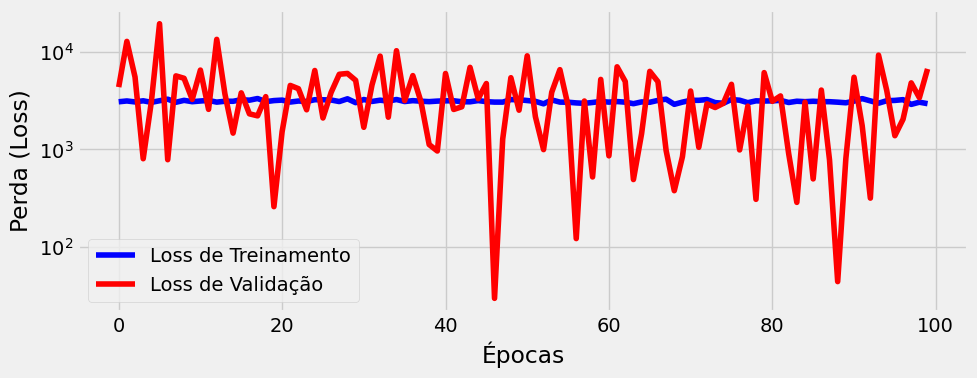

In [ ]:
fig = arch.plot_losses()

In [ ]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[ -36.2007,  -57.6334, -112.9458]])), ('linear.bias', tensor([-21.6598]))])


## 🔮 Realizando Predições (`Making Predictions`)

Nesta etapa, usamos o modelo treinado para fazer predições com base em novos dados (conjunto de validação).

O processo ocorre em duas fases principais:

### 1. **Logits (valores brutos da rede)**
Primeiro, obtemos os **logits**, que são os valores contínuos (z) retornados pela camada de saída da rede neural:

$$
\Large y =
\begin{cases}
1,\ \text{se } z \ge 0 \\
0,\ \text{se } z < 0
\end{cases}
$$

```python
logits_val = arch.predict(X_val[:4].values)


$$
\Large y =
\begin{cases}
1,\ \text{if } z \ge 0
\\
0,\ \text{if } z < 0
\end{cases}
$$

In [ ]:
# prediction logits (z)
logits_val = arch.predict(X_val[:4].values) # Convert the DataFrame subset to a NumPy array
logits_val

array([[ -17.476753],
       [-133.05    ],
       [-228.44331 ],
       [-235.03828 ]], dtype=float32)

### **2. Probabilidades (após a função sigmoide)**
Aplicamos a função **sigmoide** para transformar os logits em probabilidades entre 0 e 1:

$$
\Large y =
\begin{cases}
1,\ \text{if P}(y=1) \ge 0.5
\\
0,\ \text{if P}(y=1) < 0.5
\end{cases}
$$

$$
\Large y =
\begin{cases}
1,\ \text{if } \sigma(z) \ge 0.5
\\
0,\ \text{if } \sigma(z) < 0.5
\end{cases}
$$

In [ ]:
# prediction probabilities
prob_val = torch.sigmoid(torch.as_tensor(logits_val[:4]).float())
prob_val

tensor([[2.5701e-08],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00]])

In [ ]:
classes = (prob_val >= 0.5).to(torch.int8)
classes

tensor([[0],
        [0],
        [0],
        [0]], dtype=torch.int8)

## 📊 Visualização dos Dados e Resultados (`Data Visualization`)

Nesta etapa, realizamos a visualização gráfica do modelo, suas predições e o desempenho no conjunto de teste. Isso é fundamental para compreender como o modelo está se comportando e onde ele está acertando ou errando.

### 🔹 Visualização da Fronteira de Decisão
Utilizamos a função `figure7()` para gerar uma **fronteira de decisão** bidimensional, que mostra graficamente como o modelo separa as classes com base em duas das variáveis de entrada. Como o modelo trabalha com três atributos, criamos uma **terceira variável artificial** (preenchida com zeros) apenas para permitir a plotagem.

```python
fig = figure7(X_val, y_val, arch.model, arch.device)


In [ ]:
def figure7(X, y, model, device, cm=None, cm_bright=None):
    if cm is None:
        cm = plt.cm.RdBu  # Paleta de cores padrão para o fundo
    if cm_bright is None:
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])  # Cores brilhantes para as classes
    fig = plt.figure(figsize=(15, 4.5))  # Define o tamanho da figura

    # Cria a malha de pontos (meshgrid) — era o que faltava
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

    # Para aumentar a resolução do gráfico, diminua o valor de h
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Altere a entrada do modelo para incluir 3 atributos (features)
    num_samples = xx.ravel().shape[0]
    # Cria uma terceira feature fictícia (exemplo: preenchida com zeros)
    third_feature = np.zeros(num_samples)
    # Empilha as três features juntas para formar a entrada do modelo
    input_data = np.c_[xx.ravel(), yy.ravel(), third_feature]

    # Faz a previsão dos logits com o modelo
    logits = model(torch.as_tensor(input_data).float().to(device))

    # ... (o restante do código permanece o mesmo) ...

    return fig


In [ ]:
# Conjunto de Validação
# Gera o gráfico da fronteira de decisão usando os dados de validação
fig = figure7(X_val, y_val, arch.model, arch.device)

<Figure size 1500x450 with 0 Axes>

Matriz de Confusão (Conjunto de Teste):
[[407 389]
 [103  31]]


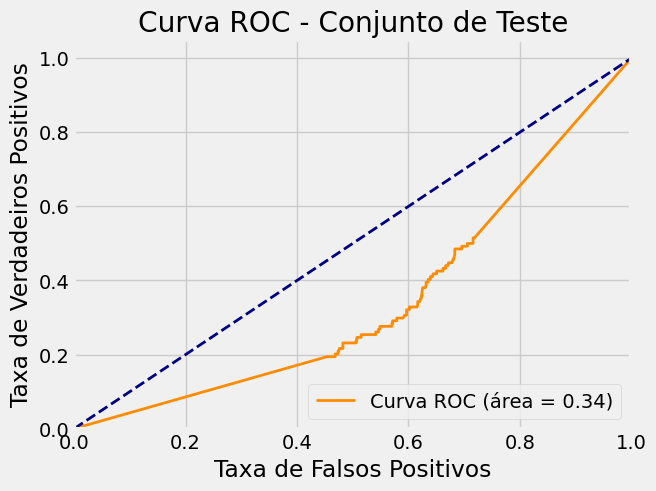

In [ ]:
# Predição no conjunto de teste
logits_test = arch.predict(X_test.values)  # Logits brutos (saída do modelo antes da sigmoide)
prob_test = torch.sigmoid(torch.as_tensor(logits_test).float())  # Aplica a função sigmoide para obter probabilidades
classes_test = (prob_test >= 0.5).to(torch.int8)  # Converte probabilidades em classes (0 ou 1) com base no limiar de 0.5

# Avaliação no conjunto de teste (usando y_test como referência)
cm_test = confusion_matrix(y_test, classes_test)
print("Matriz de Confusão (Conjunto de Teste):")
print(cm_test)

# Opcional: Plota a curva ROC e calcula a AUC para o conjunto de teste
fpr, tpr, _ = roc_curve(y_test, prob_test)  # Taxa de falsos positivos e verdadeiros positivos
roc_auc = auc(fpr, tpr)  # Área sob a curva ROC

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha de referência (classificador aleatório)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Conjunto de Teste')
plt.legend(loc="lower right")
plt.show()

## 🔲 Matriz de Confusão (`Confusion Matrix`)

A **matriz de confusão** é uma ferramenta fundamental para avaliar o desempenho de um modelo de classificação binária. Ela mostra, de forma tabular, a quantidade de acertos e erros do modelo para cada classe.




[[407 389]
 [103  31]]


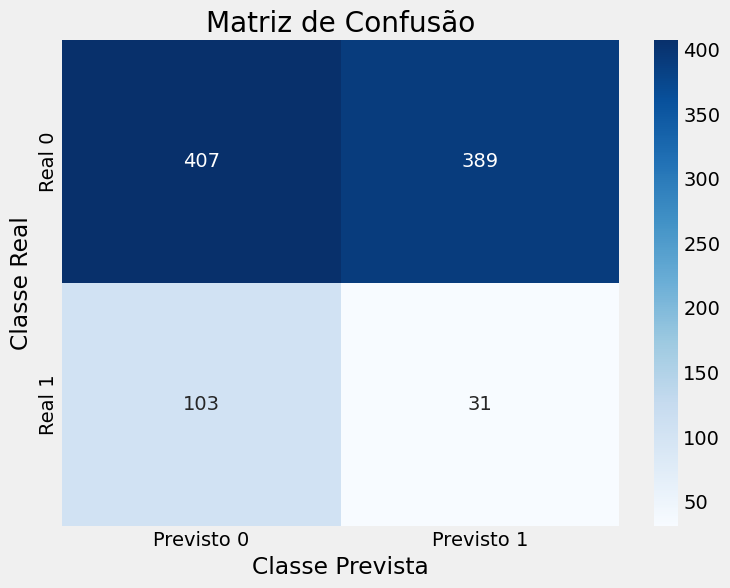

In [ ]:
# Supondo que 'y_test' contenha os rótulos reais e 'arch' seja o modelo treinado
# Realiza a predição de probabilidades com o modelo
y_pred_prob = arch.predict(X_test.values)

# Converte as probabilidades em classes (0 ou 1) com limiar de 0.5
y_pred = (torch.sigmoid(torch.as_tensor(y_pred_prob).float()) >= 0.5).to(torch.int8).numpy()

# Calcula a matriz de confusão comparando os rótulos reais e os previstos
cm = confusion_matrix(y_test, y_pred)

# Exibe a matriz no terminal
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns

# Cria um mapa de calor para visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto 0', 'Previsto 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()


## 📉 Análise da Matriz de Confusão Obtida

A matriz de confusão resultante do modelo sobre o conjunto de teste apresentou os seguintes valores:

|                     | **Previsto: 0** | **Previsto: 1** |
|---------------------|----------------|----------------|
| **Real: 0** (Neg.)  | 407 (✅ TN)     | 389 (❌ FP)     |
| **Real: 1** (Pos.)  | 103 (❌ FN)     | 31 (✅ TP)      |

### 🔍 Interpretação:

- **407 Verdadeiros Negativos (TN)**: o modelo acertou ao prever "não admitido".
- **31 Verdadeiros Positivos (TP)**: o modelo acertou ao prever "admitido".
- **389 Falsos Positivos (FP)**: o modelo previu "admitido", mas na verdade não era.
- **103 Falsos Negativos (FN)**: o modelo previu "não admitido", mas a pessoa foi admitida.

### ⚠️ Observações:

- O modelo está com **baixo desempenho na detecção dos casos positivos (admitidos)**.
- A quantidade de **falsos positivos (389)** e **falsos negativos (103)** é alta, o que indica **baixa precisão e revocação** para a classe positiva.
- É importante considerar o **balanceamento das classes** e talvez aplicar **técnicas de ajuste de limiar, reamostragem ou tuning**.

Este tipo de análise é essencial para entender **como e onde o modelo está errando**, e como ele pode ser melhorado.


## 📊 Métricas de Avaliação (`Metrics`)

A partir da **matriz de confusão**, podemos extrair os seguintes valores:

- **TN** (True Negatives / Verdadeiros Negativos)
- **FP** (False Positives / Falsos Positivos)
- **FN** (False Negatives / Falsos Negativos)
- **TP** (True Positives / Verdadeiros Positivos)

Esses valores são extraídos com a função:

```python
tn, fp, fn, tp = split_cm(cm)


In [ ]:
def split_cm(cm):
    # Negativos reais estão na primeira linha (topo da matriz)
    actual_negative = cm[0]
    # Verdadeiros negativos (TN) estão na primeira coluna
    tn = actual_negative[0]
    # Falsos positivos (FP) estão na segunda coluna
    fp = actual_negative[1]

    # Positivos reais estão na segunda linha (parte inferior da matriz)
    actual_positive = cm[1]
    # Falsos negativos (FN) estão na primeira coluna
    fn = actual_positive[0]
    # Verdadeiros positivos (TP) estão na segunda coluna
    tp = actual_positive[1]

    return tn, fp, fn, tp


## 📈 Taxas de Verdadeiros e Falsos Positivos (`True and False Positive Rates`)

Essas métricas são fundamentais para entender como o modelo se comporta ao **classificar casos positivos** (classe 1).

### ✅ Taxa de Verdadeiros Positivos (TPR) — *Recall ou Sensibilidade*

A **True Positive Rate (TPR)** mede a proporção de exemplos **positivos corretamente identificados** pelo modelo:

$$
\text{TPR} = \frac{TP}{TP + FN}
$$

- Indica o quão bem o modelo **identifica os casos positivos**.
- Também conhecida como **Recall**.
- Alta TPR é importante em aplicações onde é crítico **não deixar de detectar um caso positivo** (ex: diagnóstico de doenças, risco de evasão).

### ❌ Taxa de Falsos Positivos (FPR)

A **False Positive Rate (FPR)** mede a proporção de exemplos **negativos incorretamente classificados como positivos**:

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

- Indica o quão frequentemente o modelo **erra ao prever positivo quando deveria ser negativo**.
- Alta FPR pode ser problemática em situações onde o custo de um falso alarme é alto.



In [ ]:
def tpr_fpr(cm):
    tn, fp, fn, tp = split_cm(cm)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return tpr, fpr

## 🎯 Precisão e Revocação (`Precision and Recall`)


### 📌 Precisão (Precision)

A **precisão** mede a proporção de predições positivas que realmente são verdadeiras:

$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

Ou seja, entre todos os exemplos que o modelo classificou como positivos, quantos **realmente eram positivos**?

- Alta precisão → poucos falsos positivos.
- Importante em contextos onde o **custo de um falso positivo é alto** (ex: detectar uma doença que não existe).

### 📌 Revocação (Recall)

A **revocação** (ou sensibilidade) mede a proporção de exemplos positivos corretamente identificados:

$$
\text{Revocação} = \frac{TP}{TP + FN}
$$

Ou seja, entre todos os exemplos que **deveriam ser positivos**, quantos o modelo acertou?

- Alta revocação → poucos falsos negativos.
- Importante quando o **erro de não detectar um caso positivo é crítico** (ex: não detectar um aluno em risco de evasão).


In [ ]:
def precision_recall(cm):
    tn, fp, fn, tp = split_cm(cm)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    return precision, recall

## ✅ Cálculo da Acurácia

A acurácia representa a proporção de previsões corretas feitas pelo modelo (tanto verdadeiros positivos quanto verdadeiros negativos) em relação ao total de amostras.

Ela é calculada a partir da matriz de confusão com a seguinte fórmula:

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Onde:
- **TP**: Verdadeiros Positivos
- **TN**: Verdadeiros Negativos
- **FP**: Falsos Positivos
- **FN**: Falsos Negativos

Essa métrica é útil especialmente quando as classes estão balanceadas.


In [ ]:
# Função para calcular a acurácia a partir da matriz de confusão
def accuracy(cm):
    # Divide a matriz de confusão em TN, FP, FN e TP
    tn, fp, fn, tp = split_cm(cm)

    # Acurácia: proporção de previsões corretas (positivas e negativas)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    return accuracy

# Calcula e exibe a acurácia
acc = accuracy(cm)
print(f"Acurácia: {acc}")


Acurácia: 0.47096774193548385
